# FLIGHT PRICE PREDICTION


Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) 

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

### STEPS
 
## 1. Data Collection
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, 
More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, 
skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have 
limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, 
source, destination, route, departure time, arrival time, duration, total stops and the target variable 
price. You can make changes to it, you can add or you can remove some columns, it completely
depends on the website from which you are fetching the data.
## 2. Data Analysis
After cleaning the data, you have to do some analysis on the data. 
Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
morning flights expensive?

## 3. Model Building
After collecting the data, you need to build a machine learning model. Before model building do 
all data pre-processing steps. Try different models with different hyper parameters and select 
the bestmodel.
Follow the complete life cycle of data science. Include all the steps like

   1. Data Cleaning
   2. Exploratory Data Analysis
   3. Data Pre-processing
   4. Model Building
   5. Model Evaluation
   6. Selecting the best model

# Importing required liabraries

In [1]:
# Importing some liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings ('ignore')

# Importing data and coverting it to DataFrame

In [2]:
df = pd.read_excel('Flight Price Prediction-Scraping.xlsx')

In [3]:
# Checking sample data
df.head()

,Unnamed: 0,Flight_Name,Source,Destination,Duration,Stops,Departure,Arrival,Price
0,0,SpiceJet,New Delhi,Mumbai,02 h 05 m,Non stop,20:00,22:05,"4,524"
1,1,SpiceJet,New Delhi,Mumbai,14 h 20 m,1 stop,20:10,10:30,"4,798"
2,2,AirAsia,New Delhi,Mumbai,14 h 40 m,1 stop,04:55,19:35,"5,383"
3,3,Go First,New Delhi,Mumbai,02 h 10 m,Non stop,22:30,00:40,"5,801"
4,4,IndiGo,New Delhi,Mumbai,02 h 15 m,Non stop,02:00,04:15,"5,899"


In [4]:
df.shape

(2226, 9)

In [5]:
# Checking column names
df.columns

Index(['Unnamed: 0', 'Flight_Name', 'Source', 'Destination', 'Duration',
       'Stops', 'Departure', 'Arrival', 'Price'],
      dtype='object')

Unnamed: 0     0
Flight_Name    0
Source         0
Destination    0
Duration       0
Stops          0
Departure      0
Arrival        0
Price          0
dtype: int64


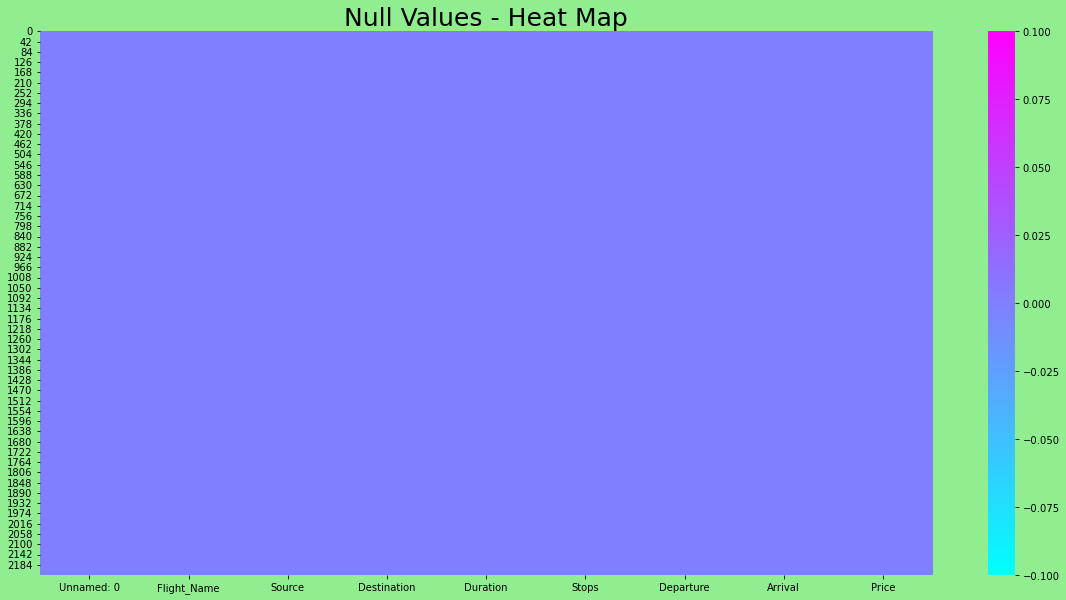

In [6]:
# Checking null values in our train dataset
print (df.isna().sum())
plt.figure(figsize=[20,10], facecolor = 'lightgreen')
sns.heatmap(df.isnull(), cmap = 'cool')
plt.title(("Null Values - Heat Map"), fontsize = 25)
plt.show()

### Observation 
1. I collected this information from the website **Make My Trip**, We have extracted 8 fields in total, and they are as follows:
- Flight Name - Flight's name.
- Source: The place where the flight began.
- Destination - The location where the aeroplane will land.
- Duration - The amount of time it took an aircraft to go from one location to another.
- Stops - If any stops occurred in the route between the source and destination.
- Departure - The time at which the flight will take off from its origin or starting point.
- Arrival: The time at which passengers arrive at their destination.
- Price - The total cost incurred.
2. There are total 2226 rows and 9 columns in our dataset.
3. Out of these 9 columns the column 'Unnnamed:0' is just the index which is not required. We can remove this as it is of no use.
4. Also here are data needs lot of changes, for that we will start with data cleaning procedure.
5. Our data have no null values.

## Data Cleaning

In [7]:
# Removing 'Unnamed:0' column
df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns

Index(['Flight_Name', 'Source', 'Destination', 'Duration', 'Stops',
       'Departure', 'Arrival', 'Price'],
      dtype='object')

In [8]:
# Checking some more information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight_Name  2226 non-null   object
 1   Source       2226 non-null   object
 2   Destination  2226 non-null   object
 3   Duration     2226 non-null   object
 4   Stops        2226 non-null   object
 5   Departure    2226 non-null   object
 6   Arrival      2226 non-null   object
 7   Price        2226 non-null   object
dtypes: object(8)
memory usage: 139.2+ KB


Every data type is shown as an object. To fix all columns, we will also use feature engineering. 

In [9]:
# Checking unique values of each column
df.nunique()

Flight_Name       9
Source           10
Destination      10
Duration        186
Stops             4
Departure       265
Arrival         269
Price          1211
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Flight_Name  2226 non-null   object
 1   Source       2226 non-null   object
 2   Destination  2226 non-null   object
 3   Duration     2226 non-null   object
 4   Stops        2226 non-null   object
 5   Departure    2226 non-null   object
 6   Arrival      2226 non-null   object
 7   Price        2226 non-null   object
dtypes: object(8)
memory usage: 139.2+ KB


Our all the columns are object type, and as we will not be able to use this in our machine learning need to convert and correct all these columns. For that we can see sample date of each column.

In [11]:
# Checking values of each column
for i in df.columns:
    print(df[i].value_counts())
    print('*****************************************')

IndiGo          1117
AirAsia          272
Go First         227
SpiceJet         160
Vistara          149
Air India        148
Akasa Air        115
Alliance Air      37
Star Air           1
Name: Flight_Name, dtype: int64
*****************************************
New Delhi    287
Mumbai       259
Bengaluru    248
Kolkata      235
Chennai      235
Ahmedabad    231
Goa          231
Hyderabad    203
Pune         149
Kochi        148
Name: Source, dtype: int64
*****************************************
New Delhi    272
Mumbai       243
Hyderabad    243
Bengaluru    237
Kolkata      233
Chennai      220
Ahmedabad    211
Goa          204
Pune         188
Kochi        175
Name: Destination, dtype: int64
*****************************************
01 h 20 m    98
01 h 10 m    94
01 h 15 m    88
02 h 15 m    84
02 h 10 m    67
             ..
23 h 35 m     1
12 h 30 m     1
13 h 45 m     1
22 h 40 m     1
10 h 20 m     1
Name: Duration, Length: 186, dtype: int64
************************************

## Correcting Features

Lets begin with correcting columns.

**Arrival - This columns contains time of flight's arrival, we will seperate extra texts for this column and also create 2 new columns one of Arrival_Hour and another of Arrival_minute and remove this one.**

**Departure - Same with this column, we will remove extra text for this column and also create 2 new columns one of Departure_Hour and another of Depature_Minute and remove this one.**

**Duration - Duration is the time take by fight from Departure to Arrival we will first convert date and time of Departure and Arrival and then will begin with forming Duration column and convert the time in hour and seconds.**

In [12]:
# Removing extra text 
df['Arrival'] =  df['Arrival'].apply(lambda x: x.replace('+ 2 DAY', ''))

In [13]:
# Converting to date and time

df["Departure"] = pd.to_datetime(df["Departure"])
df["Arrival"] = pd.to_datetime(df["Arrival"])

In [14]:
# Taking duration column using arrival and Departure
Difference = (df["Arrival"]-df["Departure"])
Diff_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600 
    Diff_list.append(duration)
df["Duration"] = Diff_list

In [15]:
# Extracting hours
df["Departure_Hour"] = pd.to_datetime(df["Departure"]).dt.hour

# Extracting minutes
df["Departure_Minute"] = pd.to_datetime(df["Departure"]).dt.minute

In [16]:
# Dropping this column
df.drop("Departure",axis=1,inplace=True)

In [17]:
# Extracting hours
df["Arrival_Hour"] = pd.to_datetime(df["Arrival"]).dt.hour

#Extracting minutes
df["Arrival_Time"] = pd.to_datetime(df["Arrival"]).dt.minute

In [18]:
# Dropping this column
df.drop("Arrival",axis=1,inplace=True)

**Price - This column type is reflecting as object, we will convert this to intiger by removing ',' and converting data to float as not sure if all our price must any any decimals in between.**

In [19]:
# Replacing ',' 
df['Price'] = df['Price'].str.replace(',','')

#Converting price data to float
df['Price'] = df['Price'].astype('float')

**Stops - There are 4 unique values in this columns, No stops, 1 Stop, 2 Stops and 3 Stops, we will assign numbers to this, where value with no stops will be replaced by 0, value with 1 stop will be replaced by 1 and so on.**

In [20]:
# Assigning numbers to stops
df.Stops.replace({"Non stop": 0,"1 stop ": 1,"2 stop ": 2,"3 stop " :3},inplace = True)

In [21]:
# checking info if our columns are converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Flight_Name       2226 non-null   object 
 1   Source            2226 non-null   object 
 2   Destination       2226 non-null   object 
 3   Duration          2226 non-null   float64
 4   Stops             2226 non-null   int64  
 5   Price             2226 non-null   float64
 6   Departure_Hour    2226 non-null   int64  
 7   Departure_Minute  2226 non-null   int64  
 8   Arrival_Hour      2226 non-null   int64  
 9   Arrival_Time      2226 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 174.0+ KB


**We have corrected our columns which are now numerical we will keep catergoircal columns and further, change them to numbers after EDA and grapical presentation. We have 3 categorical columns - Flight_Name, Source and Destination.**


# Exploratory Data Analysis (EDA)

## Univariate Analysis

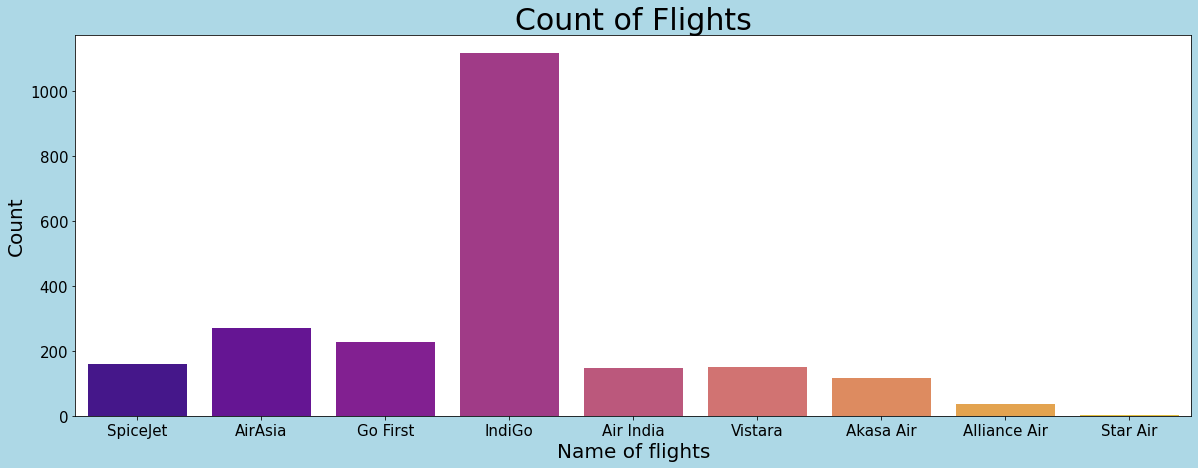

In [22]:
# Count of flights
plt.figure(figsize=(20,7), facecolor = 'lightblue')
sns.countplot( x = 'Flight_Name',data = df, palette = 'plasma')
plt.title('Count of Flights',fontsize=30)
plt.xlabel('Name of flights',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


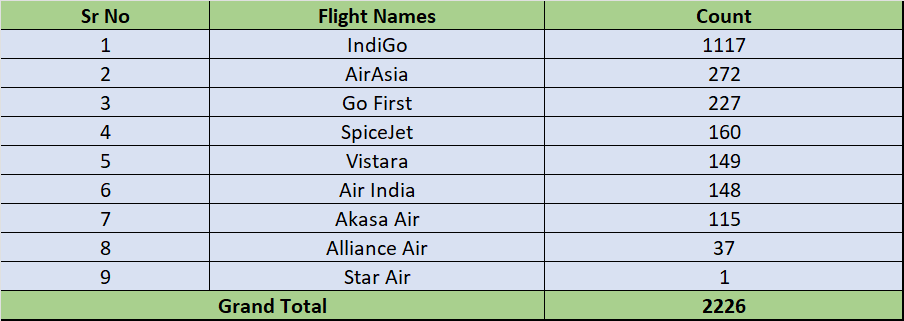

In our data most number of flights are of IndiGo with 1117 flights and least is of Star Air with only one flight, AirAsia and Go First flights have count of 272 and 227 respectively.

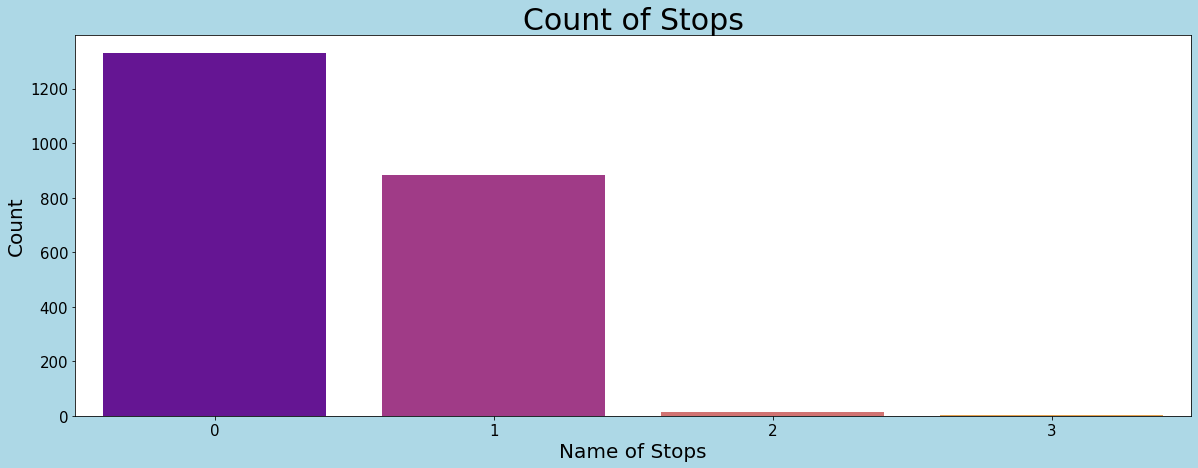

In [23]:
# Count of stops
plt.figure(figsize=(20,7), facecolor = 'lightblue')
sns.countplot( x = 'Stops',data = df, palette = 'plasma')
plt.title('Count of Stops',fontsize=30)
plt.xlabel('Name of Stops',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

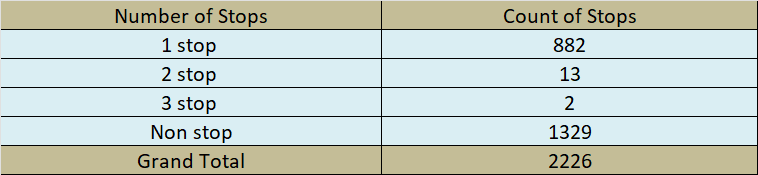

1329 flights are nonstop, and 882 flights are with 1 stop. Also count of flights with 2 or 3 stops is less, they are 13 and 2 respectively for 2 and 3 stops respectively.

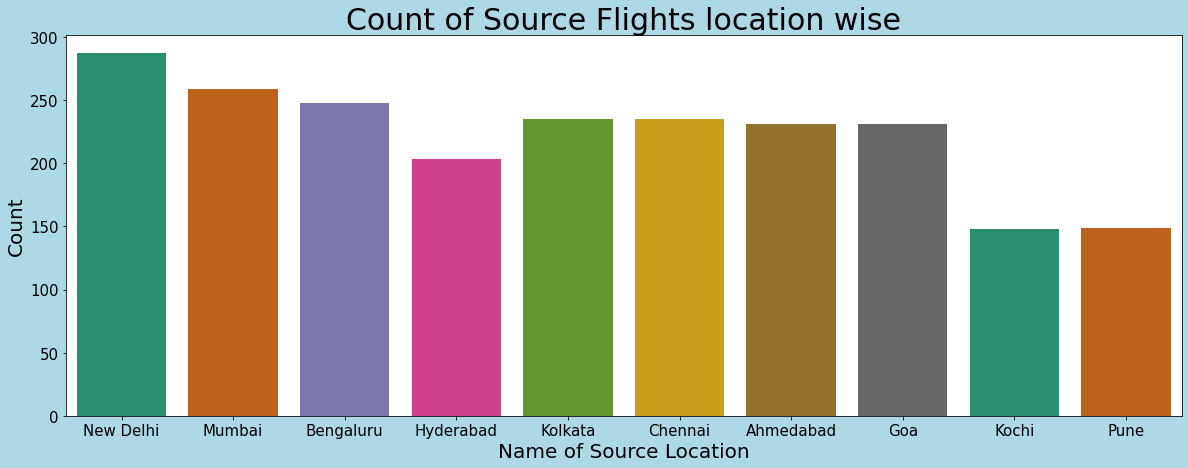

In [24]:
# Count of Source Flights location wise
plt.figure(figsize=(20,7), facecolor = 'lightblue')
sns.countplot( x = 'Source',data = df, palette = 'Dark2')
plt.title('Count of Source Flights location wise',fontsize=30)
plt.xlabel('Name of Source Location',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

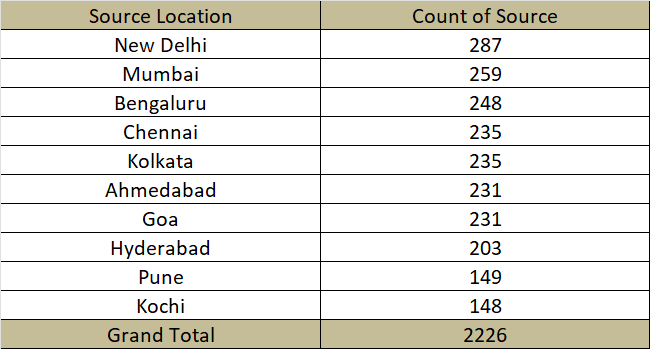

Most number of flights are started from New Delhi in our data followed by Mumbai and Bengaluru, Pune and Kochi have least number of flights at source location in our dataset.

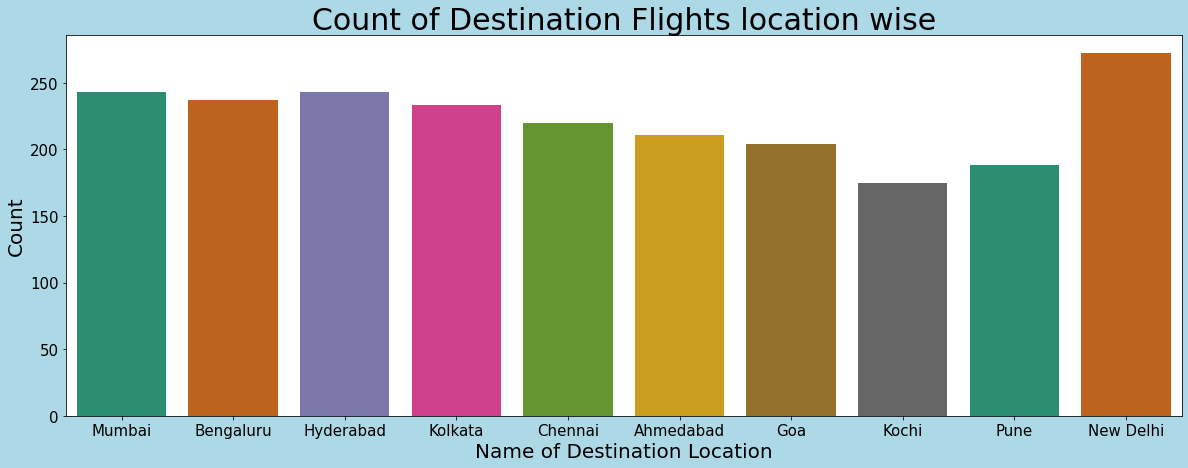

In [25]:
# Count of Destination flights location wise
plt.figure(figsize=(20,7), facecolor = 'lightblue')
sns.countplot( x = 'Destination',data = df, palette = 'Dark2')
plt.title('Count of Destination Flights location wise',fontsize=30)
plt.xlabel('Name of Destination Location',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

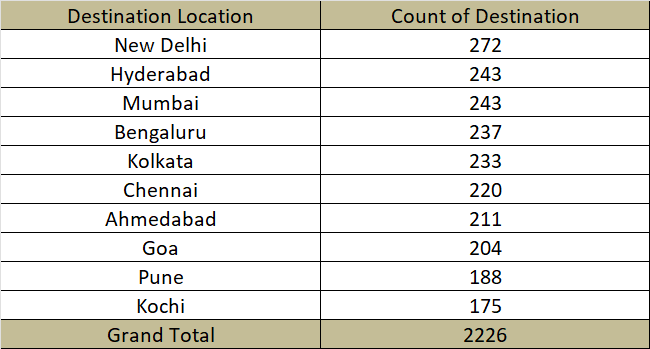

New Delhi have hightest count of Destination point followed by Mumbai and Hyderabad with same number of count, Pune and Kochi have least count with 188 and 175 Destination count respectively.

## Bivariate Analysis

We will compare target column with some features.

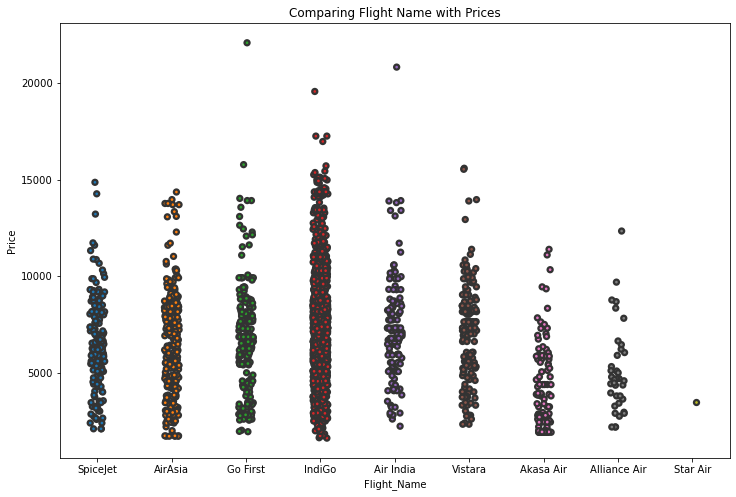

In [26]:
# Comparing Flight Name with Prices
plt.figure(figsize = (12,8), facecolor = 'White')
plt.title("Comparing Flight Name with Prices")
sns.stripplot(x = df['Flight_Name'],y= df['Price'],linewidth=2.3, edgecolor=".2")
plt.show()

Generally basic price of all flights is almost same, there might be changes according to other related features such as duration, source, duration and number of stops.

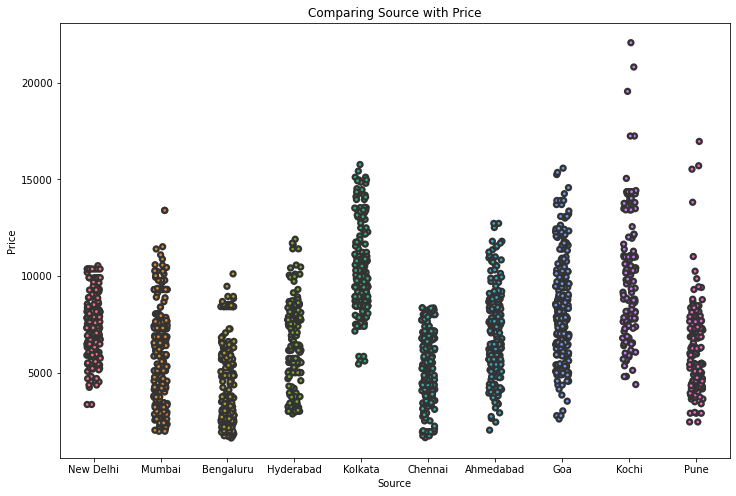

In [27]:
plt.figure(figsize = (12,8), facecolor = 'White')
plt.title("Comparing Source with Price")
sns.stripplot(x = df['Source'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

Kolkata's basic price starts from above 5000 which is more than compared with other flights.

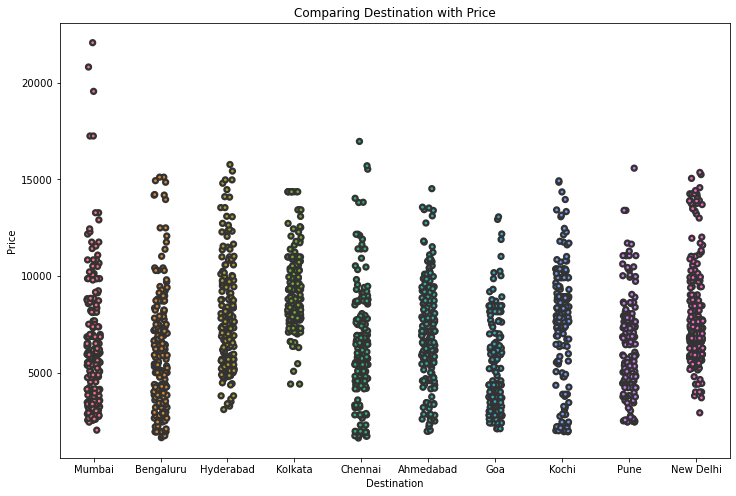

In [28]:
plt.figure(figsize = (12,8), facecolor = 'White')
plt.title("Comparing Destination with Price")
sns.stripplot(x = df['Destination'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

Also where kolkata is destination basic price is showing above 5000.

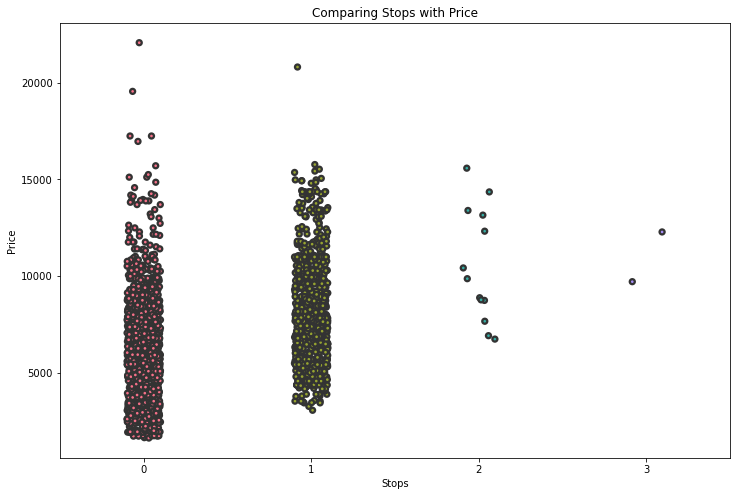

In [29]:
plt.figure(figsize = (12,8), facecolor = 'White')
plt.title("Comparing Stops with Price")
sns.stripplot(x = df['Stops'],y= df['Price'],palette = "husl",linewidth=2.3, edgecolor=".2")
plt.show()

Price of Flights keeps increasing with every stop, the price with no stops have less basic price as compared to flights with 1, 2 and 3 stops.

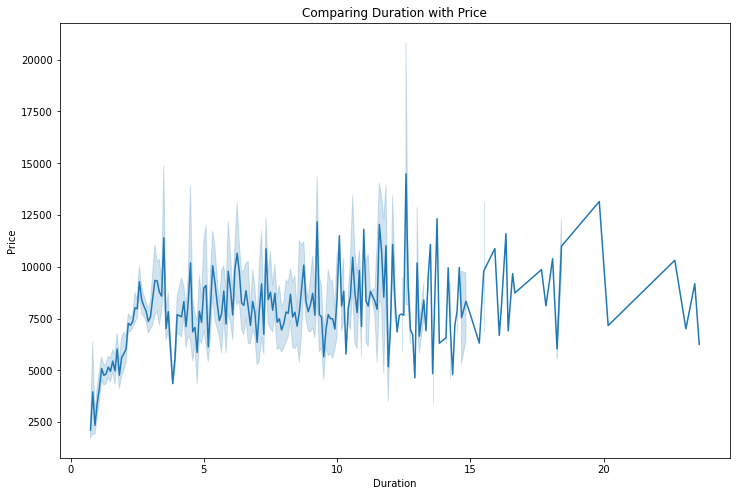

In [30]:
plt.figure(figsize = (12,8), facecolor = 'White')
plt.title("Comparing Duration with Price")
sns.lineplot(x = df['Duration'],y= df['Price'])
plt.show()

With above graps we can see that as duration of fligt increases pirce range also gets increasing.

## Multivariate Analysis

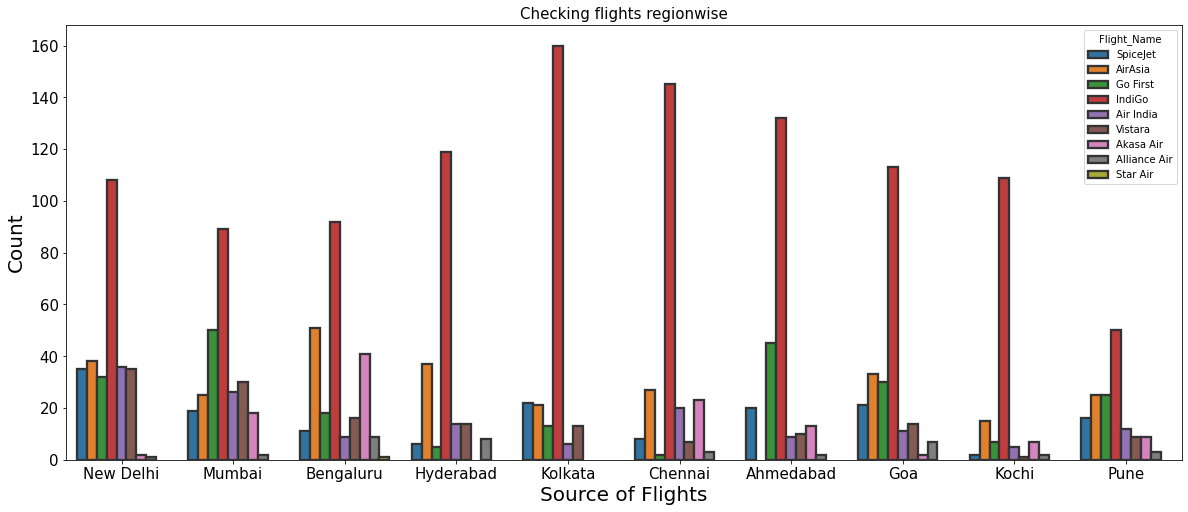

In [31]:
# let's check the most popular flight region wise
plt.figure(figsize=(20,8), facecolor = 'white')
sns.countplot(x = "Source", hue = "Flight_Name", data = df,linewidth=2.3, edgecolor=".2")
plt.title("Checking flights regionwise",fontsize=15)
plt.xlabel('Source of Flights',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

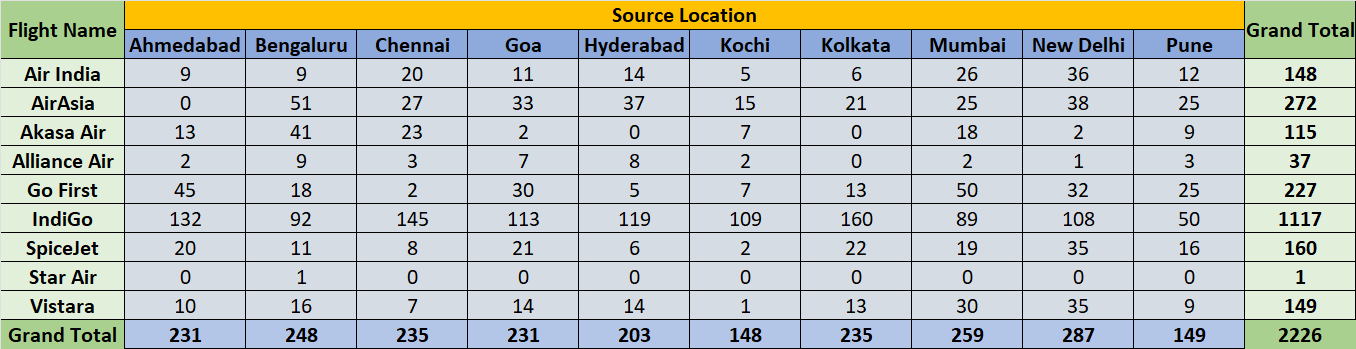

### Observation
1. IndiGo flight is most with 1117 flights in each Source Location, it actually has most number of running flights in these locations. 
2. AirAsia is at second number with 272 flights from source location.
3. Start Air has least number of flights in our data with only 1 flight.

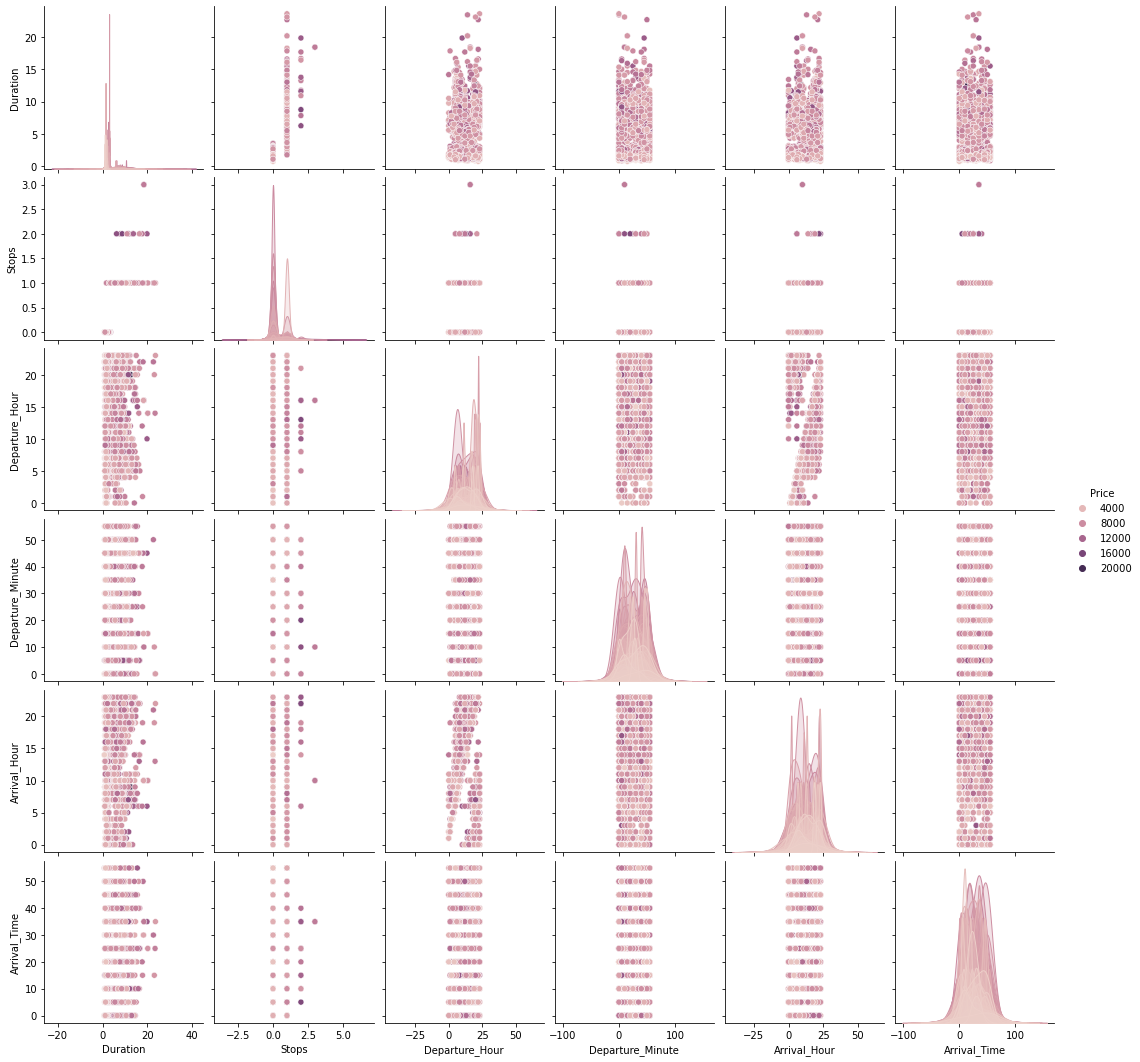

In [32]:
sns.pairplot(df,hue="Price")
plt.show()

## Data Preprocessing

In [33]:
# Assigning numberical columns in one variable for further presentation
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print (num_col)

['Duration', 'Stops', 'Price', 'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Time']


# Check Outliers

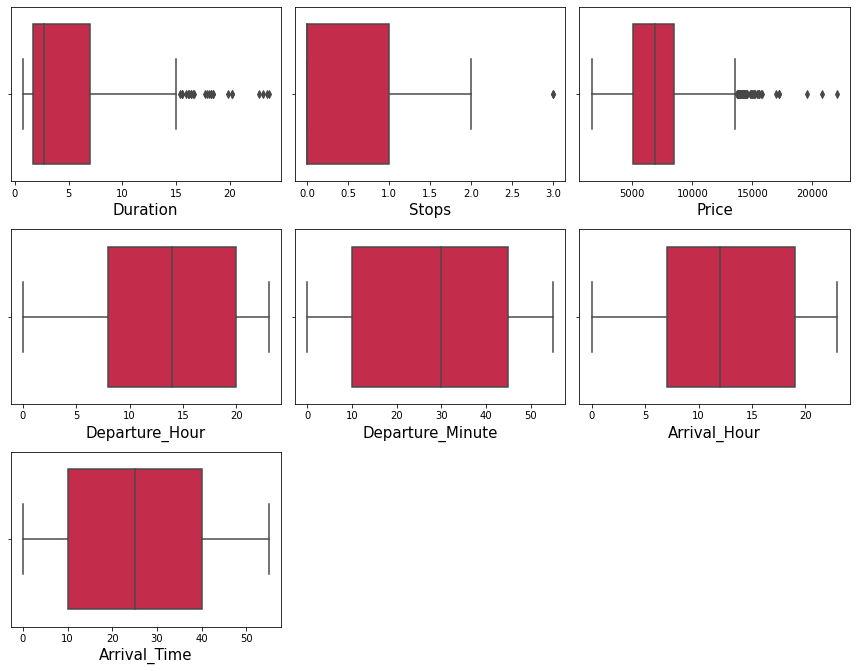

In [34]:
# Checking ourliers using boxplot

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Outliers are present in Duration, Stop and Price column, we will remove outliers from Duration column and price is our target column we wont remove outliers form this column and stop has only one outlier which is not required to be removed.
Lets remove the outlier of Duration column using z score method.

In [35]:
outliers = df[['Duration']]

In [36]:
# Importing zscore
from scipy.stats import zscore
# Removing outliers
z = np.abs(zscore(outliers))
df = df [(z<3).all(axis=1)]

In [37]:
print(df.shape)
df = df.reset_index()

(2205, 10)


In [38]:
df = df.drop("index", axis=1)

## Checking and removing skewness

In [39]:
df.skew()

Duration            1.047554
Stops               0.501531
Price               0.620209
Departure_Hour     -0.190622
Departure_Minute   -0.033448
Arrival_Hour       -0.116347
Arrival_Time        0.089265
dtype: float64

Removing Skewness of Duration, Price and Stops

In [40]:
df["Duration"] = np.sqrt(df["Duration"])

In [41]:
df["Stops"] = np.sqrt(df["Stops"])

In [42]:
df.skew()

Duration            0.661671
Stops               0.431252
Price               0.620209
Departure_Hour     -0.190622
Departure_Minute   -0.033448
Arrival_Hour       -0.116347
Arrival_Time        0.089265
dtype: float64

We have now remove skewness of 3 columns, Duration and Stops.

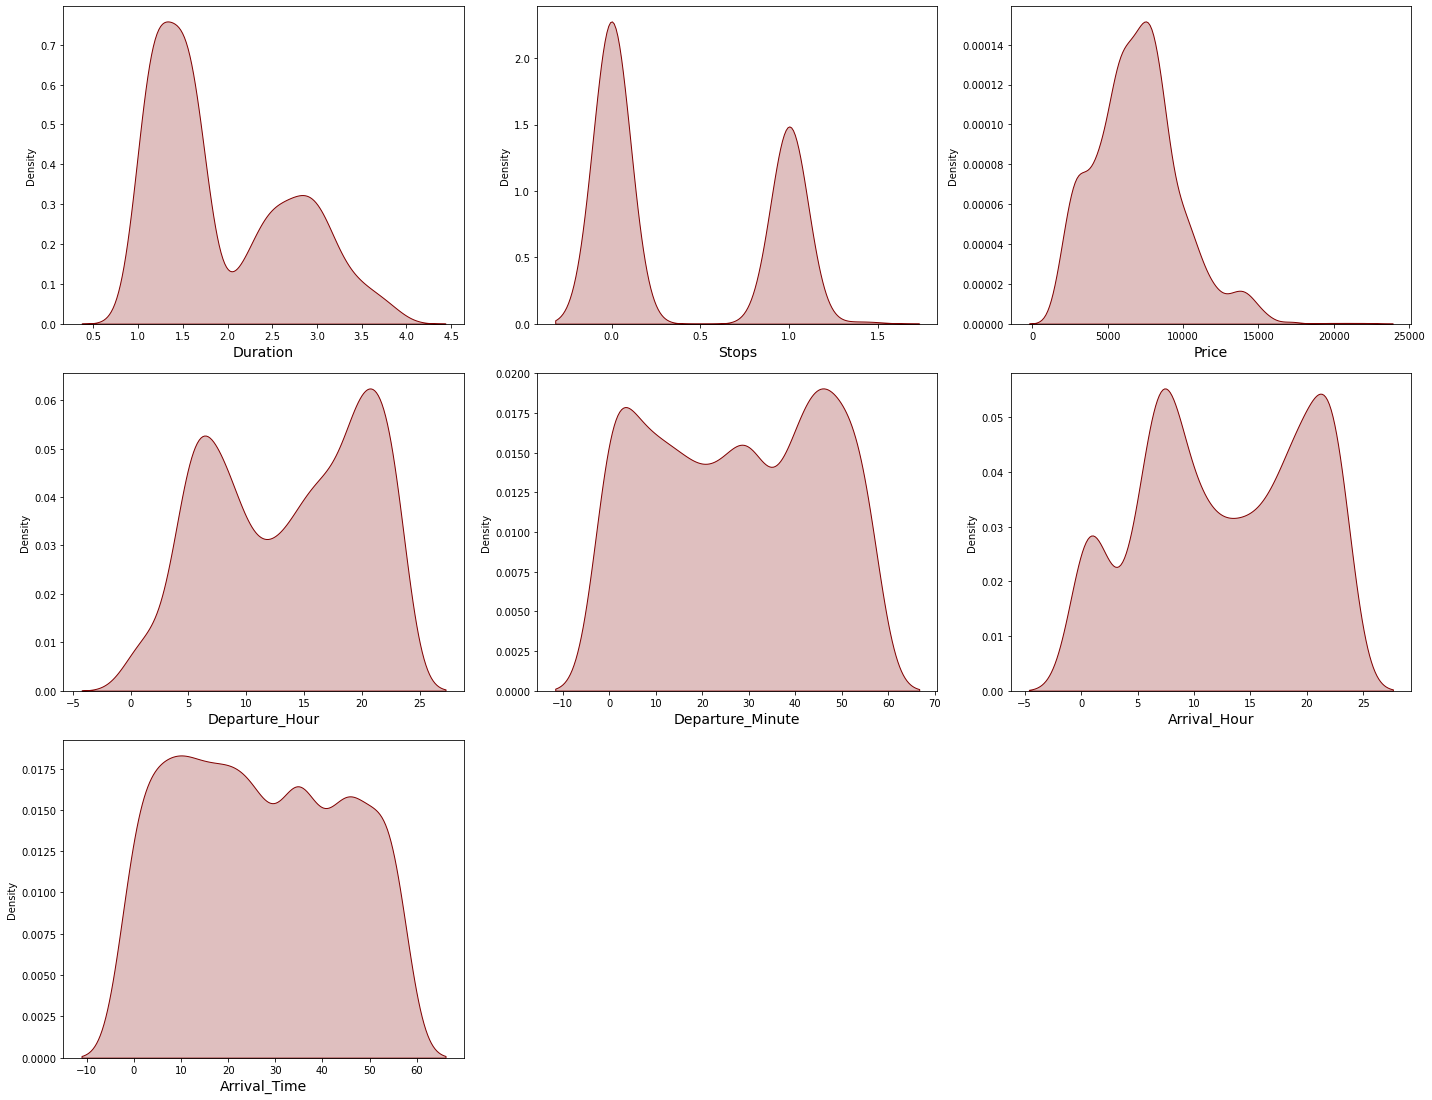

In [43]:
plt.figure(figsize=(20,20), facecolor = 'white')
plotnumber=1
for column in num_col:
    if plotnumber<=7:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],hist=False, color="maroon", kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

## Encoding Categorical columns

In [44]:
# Assigning numberical columns in one variable for further presentation
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print (cat_col)

['Flight_Name', 'Source', 'Destination']


In [45]:
# Importing LabelEncoder

from sklearn.preprocessing import LabelEncoder


LE = LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [46]:
df

,Flight_Name,Source,Destination,Duration,Stops,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Time
0,6,8,7,1.443376,0.0,4524.0,20,0,22,5
1,6,8,7,3.785939,1.0,4798.0,20,10,10,30
2,1,8,7,3.829708,1.0,5383.0,4,55,19,35
3,4,8,7,1.471960,0.0,5801.0,22,30,0,40
4,5,8,7,1.500000,0.0,5899.0,2,0,4,15
...,...,...,...,...,...,...,...,...,...,...
2200,6,9,0,1.258306,0.0,4737.0,20,0,21,35
2201,5,9,3,1.000000,0.0,5313.0,5,45,6,45
2202,6,9,3,1.040833,0.0,7360.0,12,20,13,25
2203,4,9,3,2.915476,1.0,7655.0,8,40,17,10


## Correlation 

In [47]:
# checking the correlation between features and the target
corr = df.corr()
corr

,Flight_Name,Source,Destination,Duration,Stops,Price,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Time
Flight_Name,1.000000,0.011199,-0.048834,-0.002750,0.009018,0.122458,0.019605,-0.031001,-0.003524,0.075305
Source,0.011199,1.000000,-0.129035,-0.004599,-0.076406,0.184004,-0.019795,0.052541,0.008170,0.034609
Destination,-0.048834,-0.129035,1.000000,0.074869,0.003031,0.126506,-0.013972,-0.013169,-0.024307,-0.077295
Duration,-0.002750,-0.004599,0.074869,1.000000,0.903093,0.394608,0.038190,0.039103,-0.030945,-0.029119
Stops,0.009018,-0.076406,0.003031,0.903093,1.000000,0.334123,0.019810,0.030879,-0.030368,-0.043615
Price,0.122458,0.184004,0.126506,0.394608,0.334123,1.000000,-0.025117,0.026453,0.054608,0.049223
Departure_Hour,0.019605,-0.019795,-0.013972,0.038190,0.019810,-0.025117,1.000000,-0.005062,0.103257,-0.009327
Departure_Minute,-0.031001,0.052541,-0.013169,0.039103,0.030879,0.026453,-0.005062,1.000000,-0.029763,-0.009955
Arrival_Hour,-0.003524,0.008170,-0.024307,-0.030945,-0.030368,0.054608,0.103257,-0.029763,1.000000,0.028610
Arrival_Time,0.075305,0.034609,-0.077295,-0.029119,-0.043615,0.049223,-0.009327,-0.009955,0.028610,1.000000


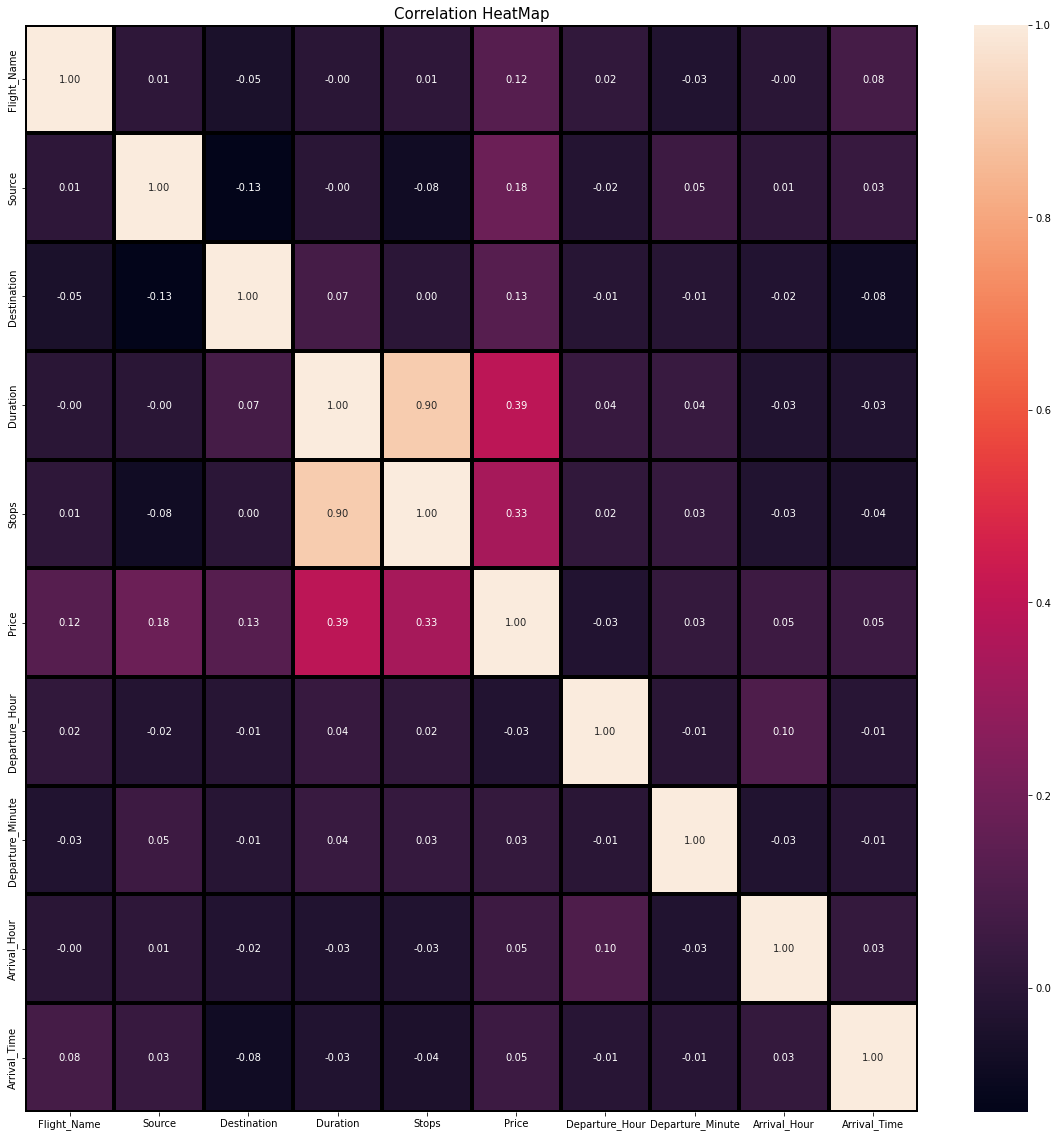

In [72]:
plt.figure (figsize = (20,20), facecolor = 'white')
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(df.corr(), annot = True , linewidths = 4, linecolor='black',fmt='.2f')
plt.show()

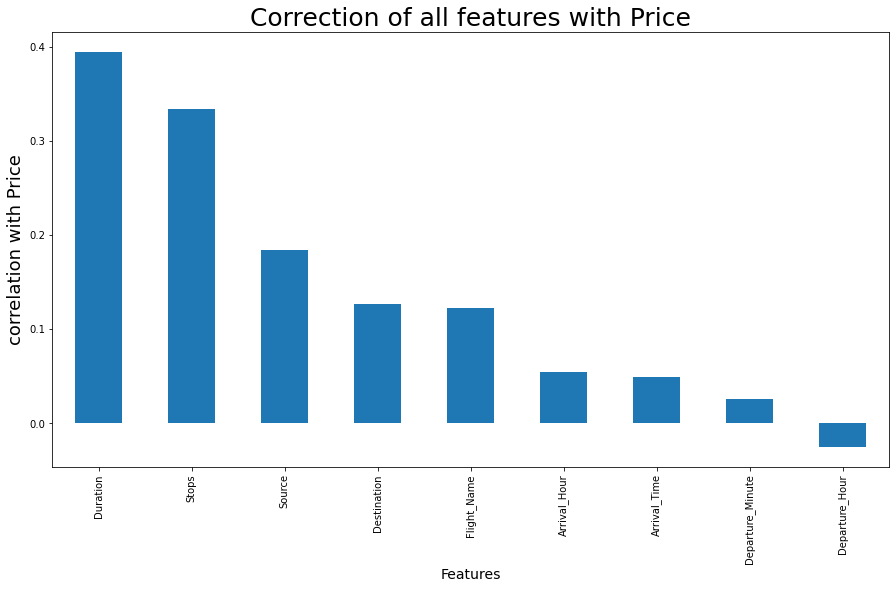

In [73]:
# Checking correlation of all features with price

plt.figure(figsize = (15,8), facecolor = 'white')
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot.bar()
plt.xlabel("Features", fontsize = 14)
plt.ylabel("correlation with Price", fontsize = 18)
plt.title ("Correction of all features with Price", fontsize = 25)
plt.show()

All features have positive correlation with target column (price), except Departure hour which have a bit negative correlation with target column.

## Dividing feature and target to X and Y

In [50]:
x = df.drop(['Price'],axis=1)
y = df['Price']
x

,Flight_Name,Source,Destination,Duration,Stops,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Time
0,6,8,7,1.443376,0.0,20,0,22,5
1,6,8,7,3.785939,1.0,20,10,10,30
2,1,8,7,3.829708,1.0,4,55,19,35
3,4,8,7,1.471960,0.0,22,30,0,40
4,5,8,7,1.500000,0.0,2,0,4,15
...,...,...,...,...,...,...,...,...,...
2200,6,9,0,1.258306,0.0,20,0,21,35
2201,5,9,3,1.000000,0.0,5,45,6,45
2202,6,9,3,1.040833,0.0,12,20,13,25
2203,4,9,3,2.915476,1.0,8,40,17,10


In [51]:
y

0       4524.0
1       4798.0
2       5383.0
3       5801.0
4       5899.0
         ...  
2200    4737.0
2201    5313.0
2202    7360.0
2203    7655.0
2204    8778.0
Name: Price, Length: 2205, dtype: float64

## Feature Scaling Using Standard Scaler

In [52]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Scalling features using StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Flight_Name,Source,Destination,Duration,Stops,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Time
0,0.897857,1.248781,0.859910,-0.633213,-0.810713,0.958077,-1.513886,1.309656,-1.255825
1,0.897857,1.248781,0.859910,2.384455,1.221304,0.958077,-0.960209,-0.361761,0.191386
2,-1.539688,1.248781,0.859910,2.440838,1.221304,-1.464063,1.531337,0.891801,0.480829
3,-0.077161,1.248781,0.859910,-0.596391,-0.810713,1.260845,0.147145,-1.754609,0.770271
4,0.410348,1.248781,0.859910,-0.560270,-0.810713,-1.766830,-1.513886,-1.197470,-0.676940
...,...,...,...,...,...,...,...,...,...
2200,0.897857,1.596409,-1.579479,-0.871618,-0.810713,0.958077,-1.513886,1.170371,0.480829
2201,0.410348,1.596409,-0.534026,-1.204365,-0.810713,-1.312679,0.977660,-0.918900,1.059713
2202,0.897857,1.596409,-0.534026,-1.151765,-0.810713,-0.252993,-0.406532,0.056093,-0.098056
2203,-0.077161,1.596409,-0.534026,1.263133,1.221304,-0.858528,0.700822,0.613232,-0.966383


# Building Models

### Finding the Best Random State and Accuracy

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [54]:

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.6960913469134247  on Random_state  56


## Creating new train test split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=56)

# Importing libraries for bulding regressor model

In [56]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import GridSearchCV

## Regression Model

### 1. DecisionTreeRegressor
### 2. RandomForestRegressor
### 3. GradientBoosting Regressor
### 4. BaggingRegressor
### 5. ExtraTreesRegressor

### Decision Tree Regressor

R2_Score: 49.271028549792526
Mean Absolute Error: 1362.094410876133
Mean Squared Error: 4362012.408232628
Root Mean Squared Error: 2088.5431305655693


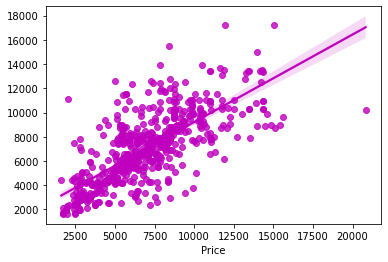

In [57]:
# DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# Checking R2 socre
predDTR = DTR.predict(x_test)
R2_score = r2_score(y_test,predDTR)*100
print('R2_Score:',R2_score)

# Evaluation Metircs
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predDTR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predDTR))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

# plotting graph for above prediction
sns.regplot(y_test,predDTR,color="m")
plt.show()

### Random Forest Regressor

R2_Score: 70.3217848717258
Mean Absolute Error: 1143.3136298733993
Mean Squared Error: 2551929.1825342122
Root Mean Squared Error: 1597.475878545342


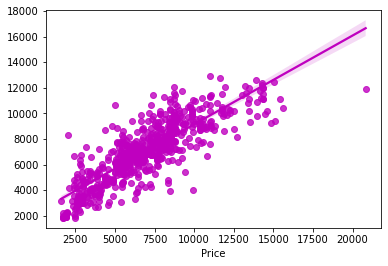

In [58]:
# RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# R2 score
predRFR = RFR.predict(x_test)
R2_score = r2_score(y_test,predRFR)*100
print('R2_Score:',R2_score)

# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predRFR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predRFR))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

# Graph of prediction
sns.regplot(y_test,predRFR,color="m")
plt.show()

### Gradient Boosting Regressor

R2_Score: 65.95529364737163
Mean Absolute Error: 1298.5605494792521
Mean Squared Error: 2927388.9712225534
Root Mean Squared Error: 1710.9614172220697


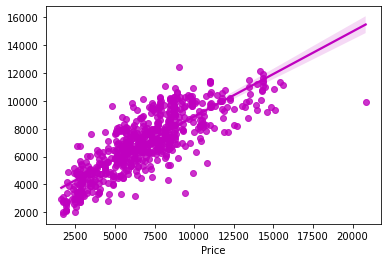

In [59]:
# GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# R2 Score
predGB = GB.predict(x_test)
R2_score = r2_score(y_test,predGB)*100
print('R2_Score:',R2_score)

# Evaluation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predGB))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predGB))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Graph of prediction
sns.regplot(y_test,predGB,color="m")
plt.show()

### Bagging Regressor

R2_Score: 67.30083651159238
Mean Absolute Error: 1202.8756619551143
Mean Squared Error: 2811690.29841779
Root Mean Squared Error: 1676.8095593769108


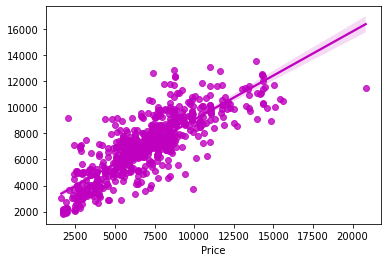

In [60]:
# BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# R2score
predBR = BR.predict(x_test)
R2_score = r2_score(y_test,predBR)*100
print('R2_Score:',R2_score)

# Evalatuion Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predBR))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predBR))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

# Graph of above prediction
sns.regplot(y_test,predBR,color="m")
plt.show()

### ExtraTreesRegressor

R2_Score: 65.355945693953
Mean Absolute Error: 1165.5491314199396
Mean Squared Error: 2978924.871417711
Root Mean Squared Error: 1725.956219438289


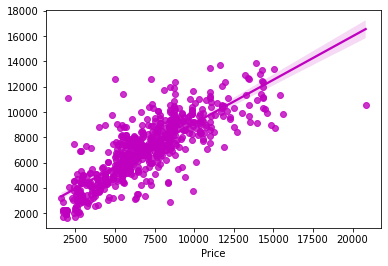

In [61]:
# ExtraTreesRegressor
XT = ExtraTreesRegressor()
XT.fit(x_train,y_train)

# R2Score
predXT = XT.predict(x_test)
R2_score = r2_score(y_test,predXT)*100
print('R2_Score:',R2_score)

# Evalation Metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predXT))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predXT))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

# Graph of prediction
sns.regplot(y_test,predXT,color="m")
plt.show()

## Model Selection

## Hyper Parameter Tuning

In [62]:
# Importing GridSearchCV for Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV

In [63]:
RF = RandomForestRegressor()

param ={'n_estimators':[100,200], 'criterion':['mse','mae'], 'min_samples_split':[2], 'min_samples_leaf':[1]}

In [64]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [69]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [70]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [71]:
print('MSE:',mean_squared_error(RF_grid_PRED,y_train))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_train))
print ('==============================================')
print('r2_score:',r2_score(RF_grid_PRED,y_train))
print ('==============================================')

MSE: 813868.6847038086
MAE: 543.7438187127735
r2_score: 0.8654714368398391


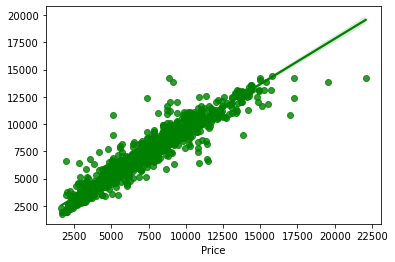

In [74]:
# visualizing the predicted values
sns.regplot(y_train,RF_grid_PRED,color="g")
plt.show()

## Saving the final model

In [75]:
# saving the model using joblib library
import joblib
joblib.dump(RF_grid_PRED,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

In [88]:
# Saving the model using .pkl
import joblib
joblib.dump(RF_grid,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

In [89]:
# Loading the saved model
model=joblib.load("Flight_Price_Prediction.pkl")
#Prediction
prediction = model.predict(x_test)

In [91]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"]).T

,Predicted,Actual
0,9494.440000,9108.0
1,10097.920000,12279.0
2,5097.084167,5025.0
3,9149.000000,8537.0
4,5498.273333,5833.0
...,...,...
657,8573.570000,6700.0
658,8134.675000,8390.0
659,8504.870000,8877.0
660,10249.250000,11022.0


We were able to anticipate the cost of the airline tickets using a regression model. We can see from the output above that the projected values are quite close to the real numbers. 

## Conclusion
The purpose of the case study is to provide an example of using machine learning algorithms to forecast the cost of airline tickets. when this project is finished. We gained understanding of the data collection, per-processing, analysis, cleaning, and model-building processes.
We used web scraping to first gather the flight information from the www.makemytrip.com website. Selenium was the technology utilised for web scraping, which offers the benefit of automating our data collection process. We gathered roughly 2333 pieces of information, including the cost of airline tickets and other relevant details. The scraped data was then stored in an excel file so we could utilise it later and analyses it.